[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W7/W7P3.ipynb)


In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels

In [2]:
def to_dataframe(text: str):
    """
    
    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")
download_data()

--2022-10-15 16:00:46--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip’

ch2data.zip         100%[===================>] 544.32K   598KB/s    in 0.9s    

2022-10-15 16:00:47 (598 KB/s) - ‘ch2data.zip’ saved [557379/557379]

Archive:  /content/ch2data.zip
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/m-baa-1911.txt  
  inflating: /content/ch2data/m-dec125910-6111.txt  
  inflating: /c

In [3]:
os.listdir()

['d-ibm3dx7008.txt',
 'q-gnp4710.txt',
 'q-gdp4708.txt',
 'w-gs1yr.txt',
 'm-baa-1911.txt',
 'm-3m4608.txt',
 'm-ibm3dx2608.txt',
 'm-aaa-1911.txt',
 'm-unrate-4811.txt',
 'd-vix0810.txt',
 'w-gs3yr.txt',
 'w-tb6ms.txt',
 'd-sp55008.txt',
 'd-aapl0305.txt',
 'm-dec125910-6111.txt',
 'w-tb3ms.txt',
 'q-GNPC96.txt',
 'm-ibm3dx2609.txt',
 'q-ko-earns8309.txt',
 'q-jnj-earns-9211.txt',
 'q-gdpc96.txt',
 'm-ibmsp6709.txt',
 'm-deciles08.txt',
 'm-dec12910.txt']

In [4]:
data_1 = to_dataframe("w-gs1yr.txt")
data_3 = to_dataframe("w-gs3yr.txt")

In [5]:
data_1 = data_1["rate"].to_numpy()
data_3 = data_3["rate"].to_numpy()

Text(0.5, 1.0, 'data_1 versus data_3')

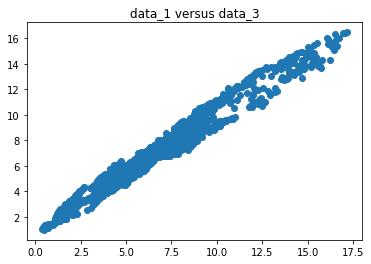

In [6]:
plt.scatter(data_1,data_3)
plt.title("data_1 versus data_3")

In [7]:
np.corrcoef(data_1, data_3)    ### there is a hurge amount of similariy between data_1 and data_2, 

array([[1.        , 0.98230522],
       [0.98230522, 1.        ]])

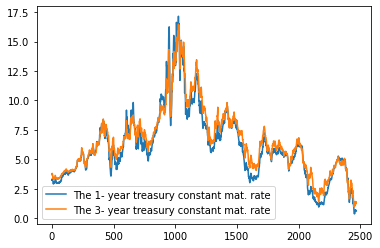

In [8]:
plt.plot(data_1, label = "The 1- year treasury constant mat. rate")
plt.plot(data_3, label = "The 3- year treasury constant mat. rate")
plt.legend()
plt.show()  ### you see these dudes follow each other.

#Let's determine now the coefficients of linear regression if you are sufficiently convinced that these dudes are pretty correlated.


In [9]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data_1.reshape(-1,1), data_3.reshape(-1,1))
lr.score(data_1.reshape(-1,1), data_3.reshape(-1,1))

0.9649235483802157

### Coefficients ###

In [10]:
lr.coef_, lr.intercept_

(array([[0.92954556]]), array([0.83213804]))

#Let's look at the residuals and plot them see what happens?

In [11]:
residuals = lr.predict(data_1.reshape(-1,1)) - data_3.reshape(-1,1)

In [12]:
residuals = residuals.reshape(-1)

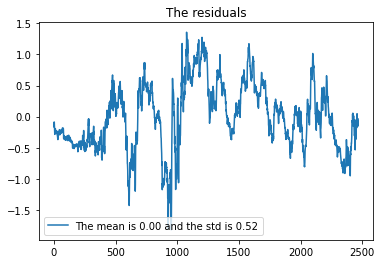

In [13]:
mean = np.mean(residuals)
std = np.std(residuals, ddof = 1)
plt.plot(-residuals, label = f"The mean is {mean:0.2f} and the std is {std:0.2f}")
plt.title("The residuals")
plt.legend() 
plt.show()

#This dude looks like a white noise, let's further investigate.

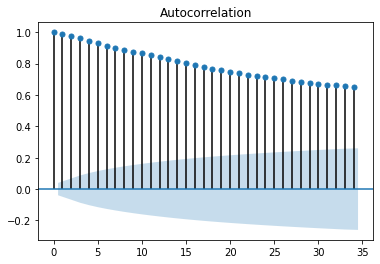

In [14]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals);

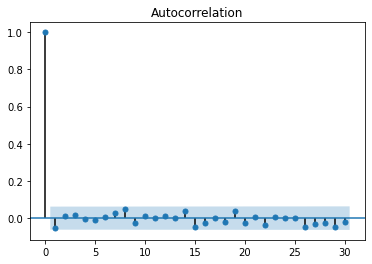

In [15]:
plot_acf(np.random.randn(1000));   ##### ACF of a white noise 

###How do we remedy this? To find out go back to slides and come back later!

In [16]:
import statsmodels
from statsmodels.tsa.stattools import adfuller


Remember:  The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

In [17]:
adfuller(residuals)   #### residuals 

(-3.61283657657986,
 0.005520309185858262,
 22,
 2444,
 {'1%': -3.4330284703548064,
  '5%': -2.86272332205779,
  '10%': -2.5673999301740325},
 -5963.684166670868)

In [18]:
adfuller(data_1)

(-1.68656380907106,
 0.4380481633629513,
 27,
 2439,
 {'1%': -3.4330339670691994,
  '5%': -2.8627257493596634,
  '10%': -2.5674012225098473},
 -1537.9399240519033)

##What is your conclusion after ADF test?

In [19]:
data_1d = np.diff(data_1)
data_3d = np.diff(data_3)

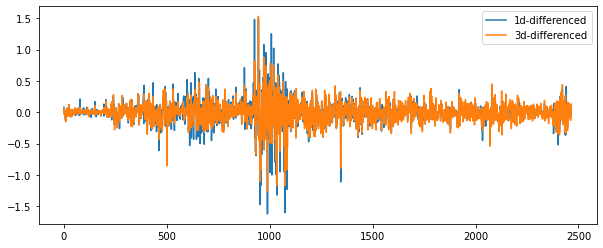

In [21]:
plt.figure(figsize = (10,4));
plt.plot(data_1d, label = "1d-differenced");
plt.plot(data_3d, label = "3d-differenced");

plt.legend()
plt.show()

#Let's apply linear regression for the differences

In [22]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data_1d.reshape(-1,1), data_3d.reshape(-1,1))
lr.score(data_1d.reshape(-1,1), data_3d.reshape(-1,1))

0.8253444800934908

In [23]:
lr.coef_, lr.intercept_

(array([[0.79193231]]), array([-0.00010515]))

In [24]:
residual_ = data_3d.reshape(-1,1) - lr.predict(data_1d.reshape(-1,1))

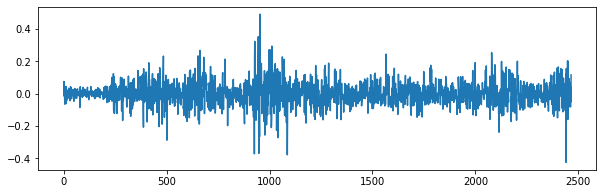

In [25]:
from matplotlib.pyplot import figure
figure(figsize=(10, 3))
plt.plot(residual_)
plt.show()   #### this dude looks pretty tame!

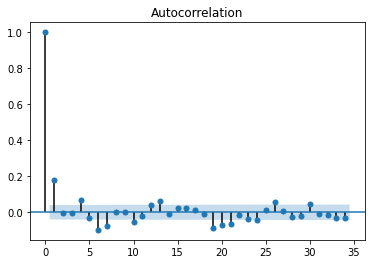

In [26]:
plot_acf(residual_); ### as expected

# At this point, before going to next cell thing about how would you model the residuals? They do not behave like white noise sequence, however can be modelled by such.

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
mod = ARIMA(residual_, order = (0,0,1))
model = mod.fit()

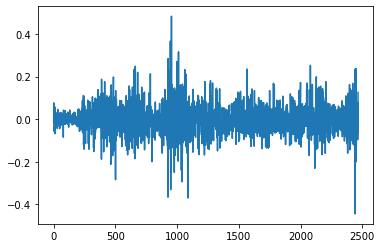

In [29]:
plt.plot(model.resid)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2466
Model:                 ARIMA(0, 0, 1)   Log Likelihood                3136.593
Date:                Sat, 15 Oct 2022   AIC                          -6267.186
Time:                        16:01:20   BIC                          -6249.755
Sample:                             0   HQIC                         -6260.854
                               - 2466                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.145e-06      0.002      0.001      0.999      -0.003       0.003
ma.L1          0.1823      0.013     13.654      0.000       0.156       0.208
sigma2         0.0046   7.48e-05     61.466      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1773.54
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model we have should be
$x_{3t} = x_{3,t-1} + 0.792(x_{1,t} - x_{1,t-1}) + a_t + a_{t-1} + \text{ very small constant}$.